In [5]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/zyq0416/workspace/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
import matplotlib.pyplot as plt
import json

from pyBrayton import Brayton

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


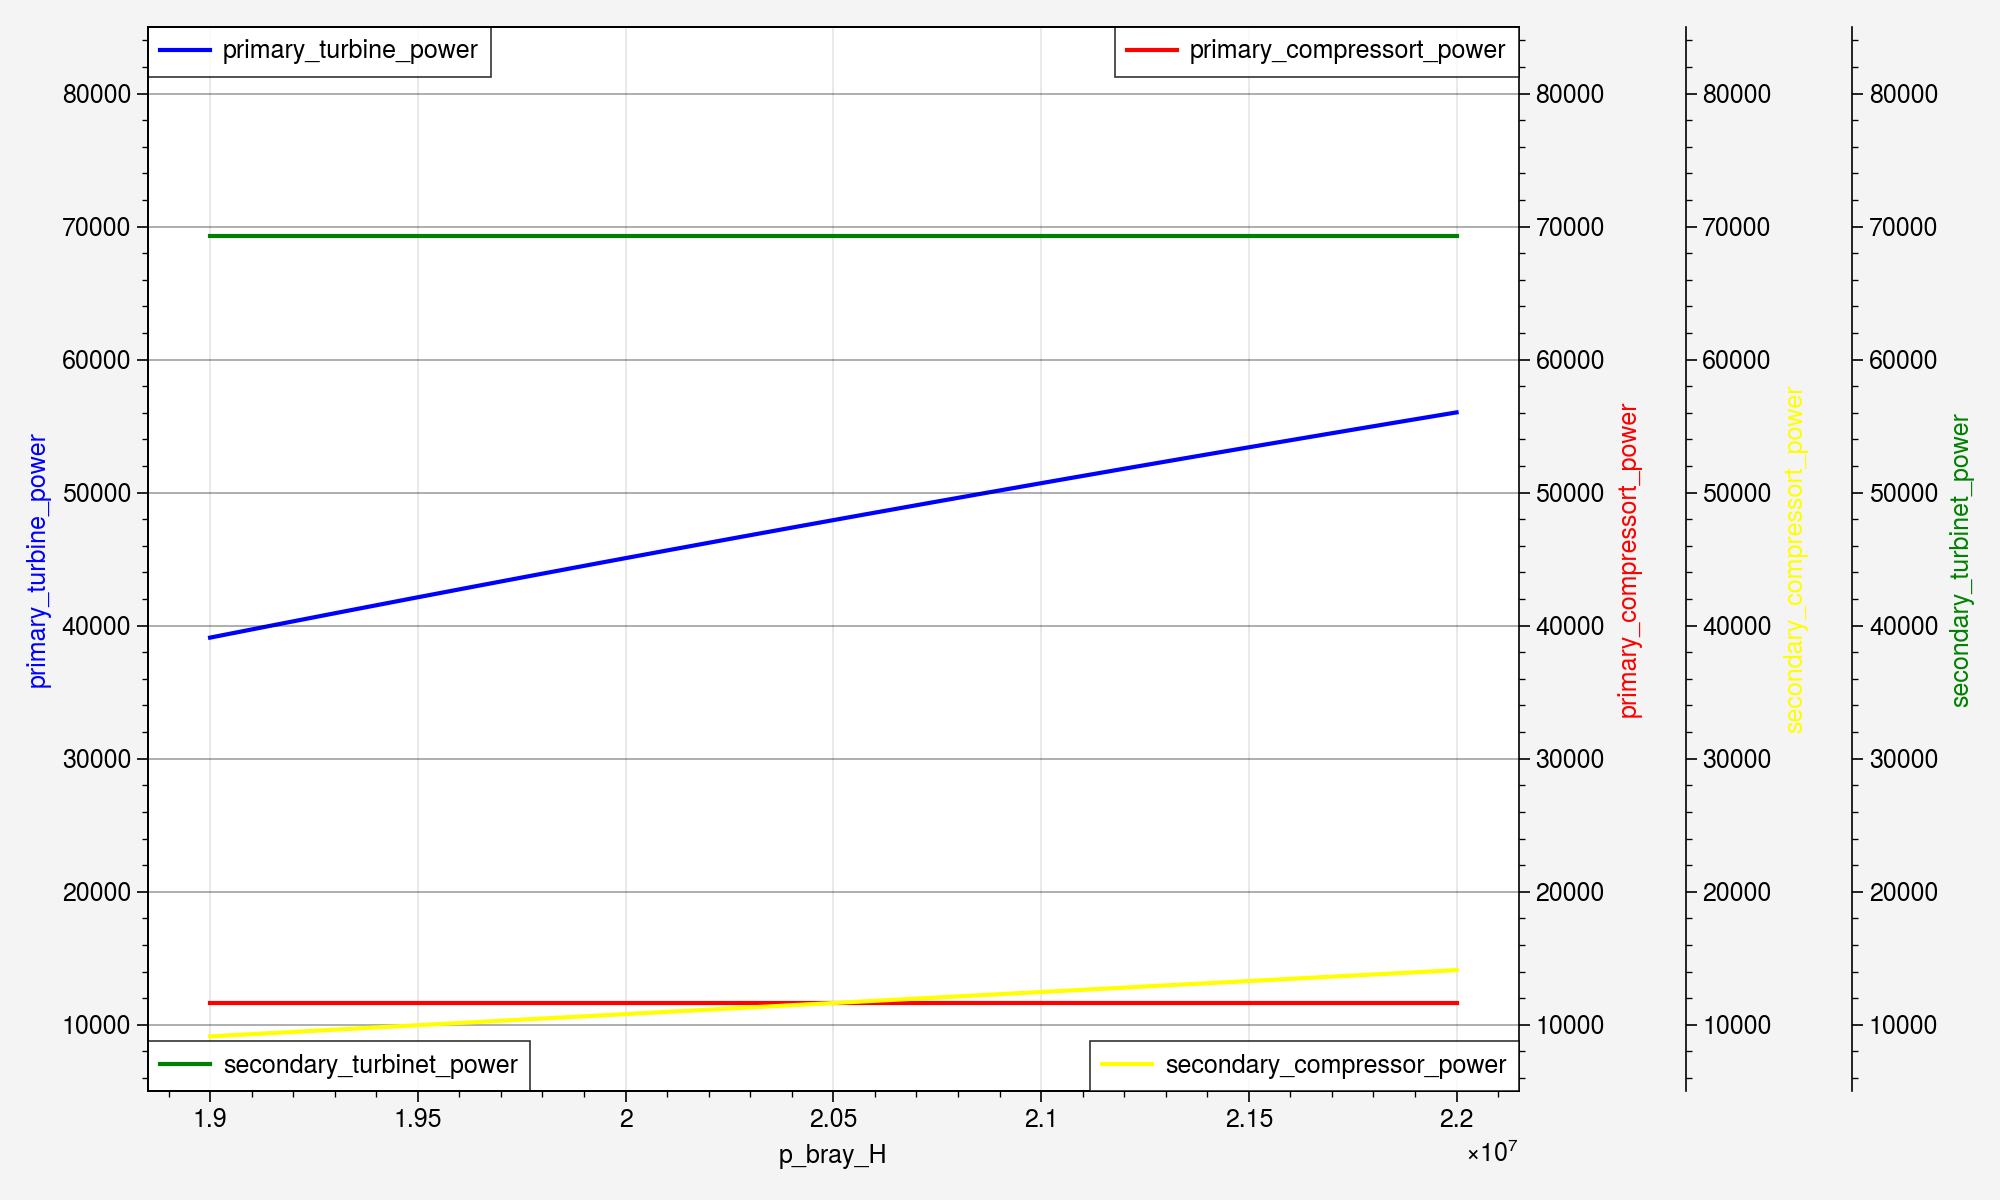

In [28]:
parameters = dict() 
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["isentropic_eff_mc"] = 0.88  #等熵效率
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
parameters["min_temperature_exchange"] = 15
parameters["industrial_waste_heat_t"] =300 #℃
parameters["heat_transfer_loss_eff"] = 0.96
parameters["t_reaction"] = 465
#parameters["p_bray_H"] = 20e6
#parameters["p_bray_M"] = 14e6
parameters["p_bray_L"] = 7.6e6
parameters["T_amb"] = 20
parameters["p_amb"] = 101325
bh=Brayton(parameters)
p_bray_H_values = np.linspace(19e6, 22e6, 20)
# Initialize lists to store results
primary_turbine_values = []
secondary_turbine_values = []
primary_compressor_values = []
secondary_compressor_values = []
# Iterate over p_bray_H values
for p_bray_H in p_bray_H_values:
    # Update input dictionary
    input={}
    input["p_bray_H"] = p_bray_H
    input["p_bray_M"] = 13740885
    input["Hydrator_heat"]=1609467.621084121
    # Solve the problem
    results = bh.solve(input)
    
    # Extract the required results
    primary_turbine = results["B_primary_turbine"]["power_turbine"]
    secondary_turbine = results["B_secondary_turbine"]["power_turbine"]
    primary_compressor = results["B_primary_compressor"]["power_compressor"]
    secondary_compressor = results["B_secondary_compressor"]["power_compressor"]

    # Append the results to the respective lists
    primary_turbine_values.append(primary_turbine)
    secondary_turbine_values.append(secondary_turbine)
    primary_compressor_values.append(primary_compressor)
    secondary_compressor_values.append(secondary_compressor)

# Plot the curves
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# Set y-axis limits for each curve
ax1.set_ylim(5000, 85000)
ax2.set_ylim(5000, 85000)
ax3.set_ylim(5000, 85000)
ax4.set_ylim(5000, 85000)

# Plot the curves with different y-axes
ax1.plot(p_bray_H_values, primary_turbine_values, label="primary_turbine_power", color='blue')
ax2.plot(p_bray_H_values, secondary_turbine_values, label="secondary_turbinet_power", color='green')
ax3.plot(p_bray_H_values, primary_compressor_values, label="primary_compressort_power", color='red')
ax4.plot(p_bray_H_values, secondary_compressor_values, label="secondary_compressor_power", color='yellow')

# Set labels and title
ax1.set_xlabel("p_bray_H")
ax1.set_ylabel("primary_turbine_power", color='blue')
ax2.set_ylabel("secondary_turbinet_power", color='green')
ax3.set_ylabel("primary_compressort_power", color='red')
ax4.set_ylabel("secondary_compressort_power", color='yellow')
#plt.title("flue_gas_mass_flow 、Energy_eff and Hot_cost with p_bray_H")

# Show legends
ax1.legend(loc='upper left')
ax3.legend(loc='upper right')
ax2.legend(loc='lower left')
ax4.legend(loc='lower right')

# Remove spines for the extra axes
ax3.spines['right'].set_visible(False)
ax4.spines['right'].set_position(('outward', 60))
ax2.spines['right'].set_position(('outward', 120))

# Adjust spacing between subplots
fig.tight_layout()

plt.grid(True)
plt.show()